**MUHAMMAD MUFTI ARDANI (221111001)**

In [ ]:
import pandas as pd

data = pd.read_csv("ikn.csv", on_bad_lines='warn')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      523 non-null    int64  
 1   created_at               523 non-null    object 
 2   favorite_count           523 non-null    int64  
 3   full_text                523 non-null    object 
 4   id_str                   523 non-null    int64  
 5   image_url                141 non-null    object 
 6   in_reply_to_screen_name  327 non-null    object 
 7   lang                     523 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              523 non-null    int64  
 10  reply_count              523 non-null    int64  
 11  retweet_count            523 non-null    int64  
 12  tweet_url                523 non-null    object 
 13  user_id_str              523 non-null    int64  
 14  username                 0

In [ ]:
df = pd.DataFrame(data[['full_text']])
df.head(5)

,full_text
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...
3,Ibu kota dipindah ke IKN karena oligarki penja...
4,Gedung terminal digenangi air setinggi 5 sampa...


**PROSES HAPUS DATA DUPLIKAT**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  523 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


In [ ]:
df.drop_duplicates(subset = "full_text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 522
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  522 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


**WORDCLOUD SEBELUM PRE-PROCESSING**

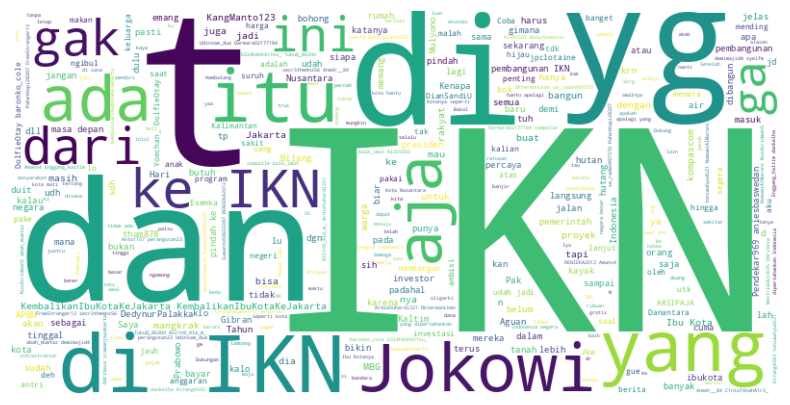

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Mengisi nilai NaN dengan string kosong ('')
df['full_text'] = df['full_text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

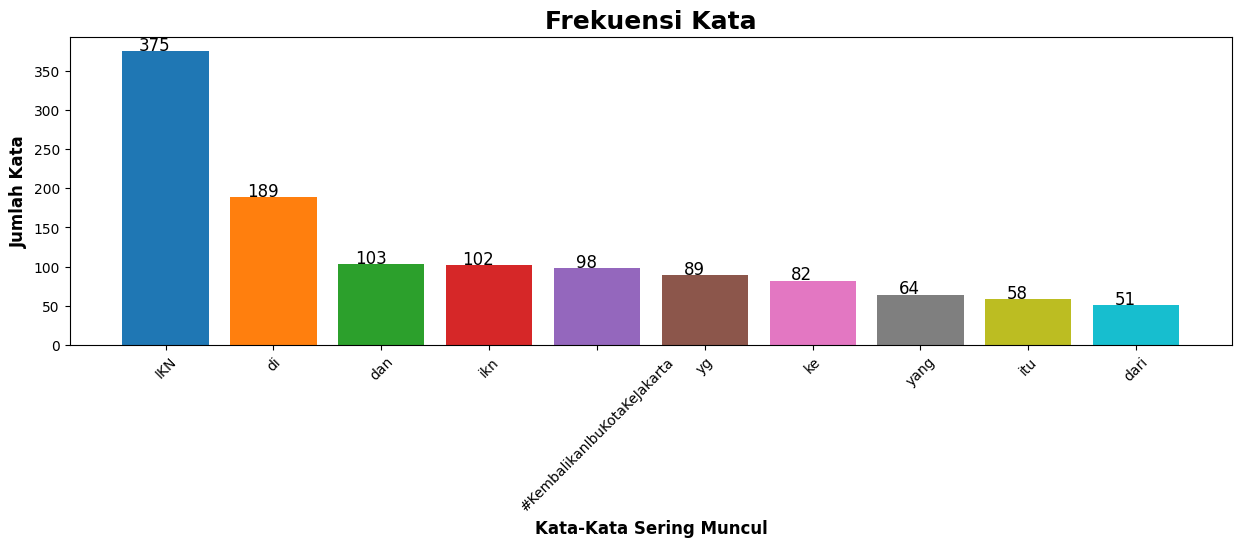

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(15, 4))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

**PROSES CLEANING**

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F700-\U0001F77F" # alchemical symbols
            u"\U0001F780-\U0001F7FF" # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F" # Chess Symbols
            u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF" # Additional emoticons
            u"\U0001F1E0-\U0001F1FF" # flags
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

# Fungsi untuk menghapus hashtag
def remove_hashtag(tweet):
    if tweet is not None and isinstance(tweet, str):
        hashtag_pattern = re.compile(r'#\S+')
        return hashtag_pattern.sub(r'', tweet)
    else:
        return tweet

def remove_username(text):
    import re
    return re.sub(r'@[^\s]+', '', text)

df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_hashtag(x))

df.head(5)

,full_text,cleaning
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...


**PROSES CASE FOLDING**

In [ ]:
def case_folding(text):
  if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
  else:
      return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,full_text,cleaning,case_folding
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...


**NORMALISASI KATA**

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fornigulo/kamus-slag
!unzip kamus-slag.zip

Dataset URL: https://www.kaggle.com/datasets/fornigulo/kamus-slag
License(s): RAIL
  0% 0.00/248k [00:00<?, ?B/s]
100% 248k/248k [00:00<00:00, 459MB/s]
Archive:  kamus-slag.zip
  inflating: kamuskatabaku.xlsx      


In [ ]:
import pandas as pd

# Fungsi penggantian kata baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
              replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# Baca dataset
data = pd.DataFrame(df[['full_text', 'cleaning', 'case_folding']])
data.head(5)

,full_text,cleaning,case_folding
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...


In [ ]:
kamus_data = pd.read_excel('kamuskatabaku.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))
kamus_data.head()

,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [ ]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df = pd.DataFrame(data[['full_text', 'cleaning', 'case_folding', 'normalisasi']])

df.head(5)

,full_text,cleaning,case_folding,normalisasi
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...,kenapa amerika tidak ngebom ikn proyek tolol i...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu se...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...,ibu kota harus pindah ke ikn dengan alasan jak...
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai ...


**TOKENISASI**

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenizing'] = df['normalisasi'].apply(tokenize)

df.head(5)

,full_text,cleaning,case_folding,normalisasi,tokenizing
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...,kenapa amerika tidak ngebom ikn proyek tolol i...,"[kenapa, amerika, tidak, ngebom, ikn, proyek, ..."
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu se...,"[jokowi, takut, ikn, dihambalangkan, karena, d..."
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...,ibu kota harus pindah ke ikn dengan alasan jak...,"[ibu, kota, harus, pindah, ke, ikn, dengan, al..."
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,"[ibu, kota, dipindah, ke, ikn, karena, oligark..."
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai ...,"[gedung, terminal, digenangi, air, setinggi, s..."


**PROSES STOPWORD REMOVAL**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenizing'].apply(lambda x: remove_stopwords(x))

df.head(5)

,full_text,cleaning,case_folding,normalisasi,tokenizing,stopword_removal
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...,kenapa amerika tidak ngebom ikn proyek tolol i...,"[kenapa, amerika, tidak, ngebom, ikn, proyek, ...","[amerika, ngebom, ikn, proyek, tolol, dibom, m..."
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu se...,"[jokowi, takut, ikn, dihambalangkan, karena, d...","[jokowi, takut, ikn, dihambalangkan, kali, sur..."
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...,ibu kota harus pindah ke ikn dengan alasan jak...,"[ibu, kota, harus, pindah, ke, ikn, dengan, al...","[kota, pindah, ikn, alasan, jakarta, tenggelam..."
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,"[ibu, kota, dipindah, ke, ikn, karena, oligark...","[kota, dipindah, ikn, oligarki, penjajah, kuas..."
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai ...,"[gedung, terminal, digenangi, air, setinggi, s...","[gedung, terminal, digenangi, air, surut, meny..."


**PROSES STEMMING DATA**

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.7 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,full_text,cleaning,case_folding,normalisasi,tokenizing,stopword_removal,stemming
0,Kenapa Amerika gak ngebom IKN proyek tolol itu...,Kenapa Amerika gak ngebom IKN proyek tolol itu...,kenapa amerika gak ngebom ikn proyek tolol itu...,kenapa amerika tidak ngebom ikn proyek tolol i...,"[kenapa, amerika, tidak, ngebom, ikn, proyek, ...","[amerika, ngebom, ikn, proyek, tolol, dibom, m...",amerika ngebom ikn proyek tolol bom mangkrak n...
1,Jokowi takut IKN di-Hambalang-kan karena dulu...,Jokowi takut IKN diHambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu s...,jokowi takut ikn dihambalangkan karena dulu se...,"[jokowi, takut, ikn, dihambalangkan, karena, d...","[jokowi, takut, ikn, dihambalangkan, kali, sur...",jokowi takut ikn dihambalangkan kali surabaya ...
2,Ibu kota harus pindah ke IKN dengan alasan Jak...,Ibu kota harus pindah ke IKN dengan alasan Jak...,ibu kota harus pindah ke ikn dengan alasan jak...,ibu kota harus pindah ke ikn dengan alasan jak...,"[ibu, kota, harus, pindah, ke, ikn, dengan, al...","[kota, pindah, ikn, alasan, jakarta, tenggelam...",kota pindah ikn alas jakarta tenggelam kembang...
3,Ibu kota dipindah ke IKN karena oligarki penja...,Ibu kota dipindah ke IKN karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,ibu kota dipindah ke ikn karena oligarki penja...,"[ibu, kota, dipindah, ke, ikn, karena, oligark...","[kota, dipindah, ikn, oligarki, penjajah, kuas...",kota pindah ikn oligarki jajah kuasa jakarta p...
4,Gedung terminal digenangi air setinggi 5 sampa...,Gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai...,gedung terminal digenangi air setinggi sampai ...,"[gedung, terminal, digenangi, air, setinggi, s...","[gedung, terminal, digenangi, air, surut, meny...",gedung terminal genang air surut sisa lumpur g...


**PROSES HAPUS DATA BERNILAI KOSONG (NAN)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 522
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         522 non-null    object
 1   cleaning          522 non-null    object
 2   case_folding      522 non-null    object
 3   normalisasi       522 non-null    object
 4   tokenizing        522 non-null    object
 5   stopword_removal  522 non-null    object
 6   stemming          522 non-null    object
dtypes: object(7)
memory usage: 32.6+ KB


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 522
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         522 non-null    object
 1   cleaning          522 non-null    object
 2   case_folding      522 non-null    object
 3   normalisasi       522 non-null    object
 4   tokenizing        522 non-null    object
 5   stopword_removal  522 non-null    object
 6   stemming          522 non-null    object
dtypes: object(7)
memory usage: 32.6+ KB


**WORDCLOUD SETELAH PRE-PROCESSING**

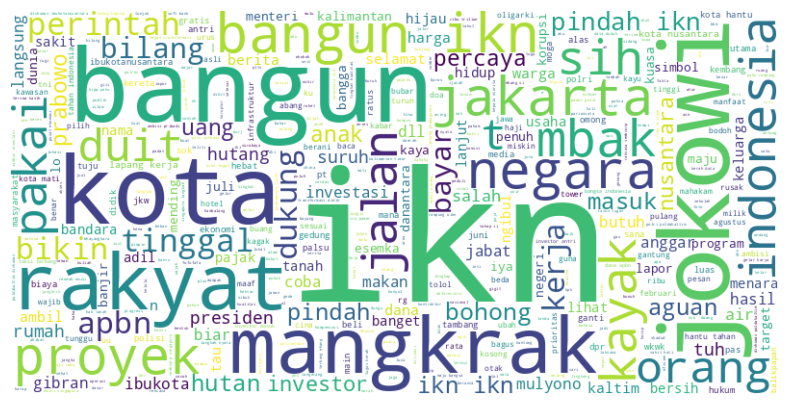

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'stemming'
text = ' '.join(data['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh','fyp', 'ya', 'gue', 'kak', 'kembalikanibukotakejakarta'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

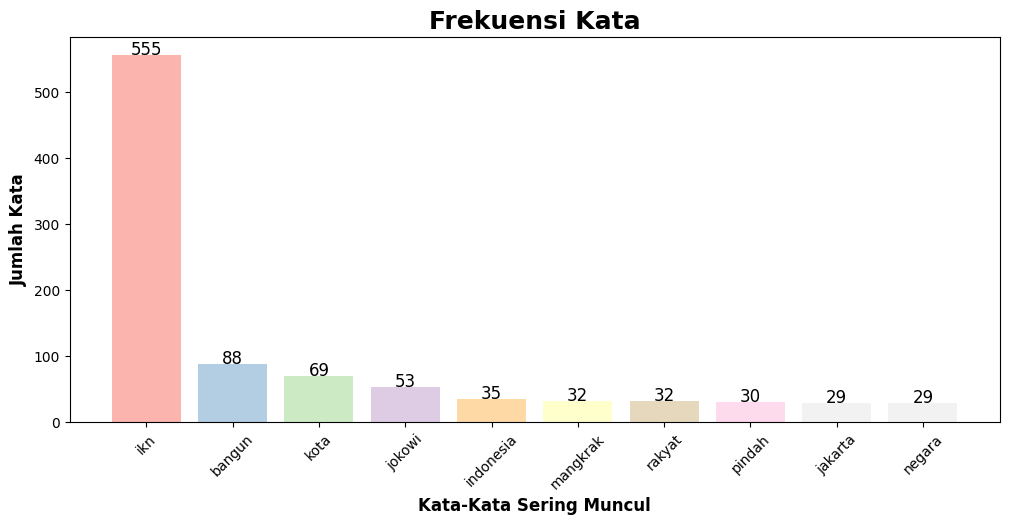

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(data["stemming"])

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh','fyp', 'ya', 'gue', 'kak', 'kembalikanibukotakejakarta'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
# Menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

# Membuat plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 1.6 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Menampilkan plot
plt.show()

In [ ]:
data.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)